<a href="https://colab.research.google.com/github/Ralmao/Advertising/blob/main/Advertising_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/advertising.csv')

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


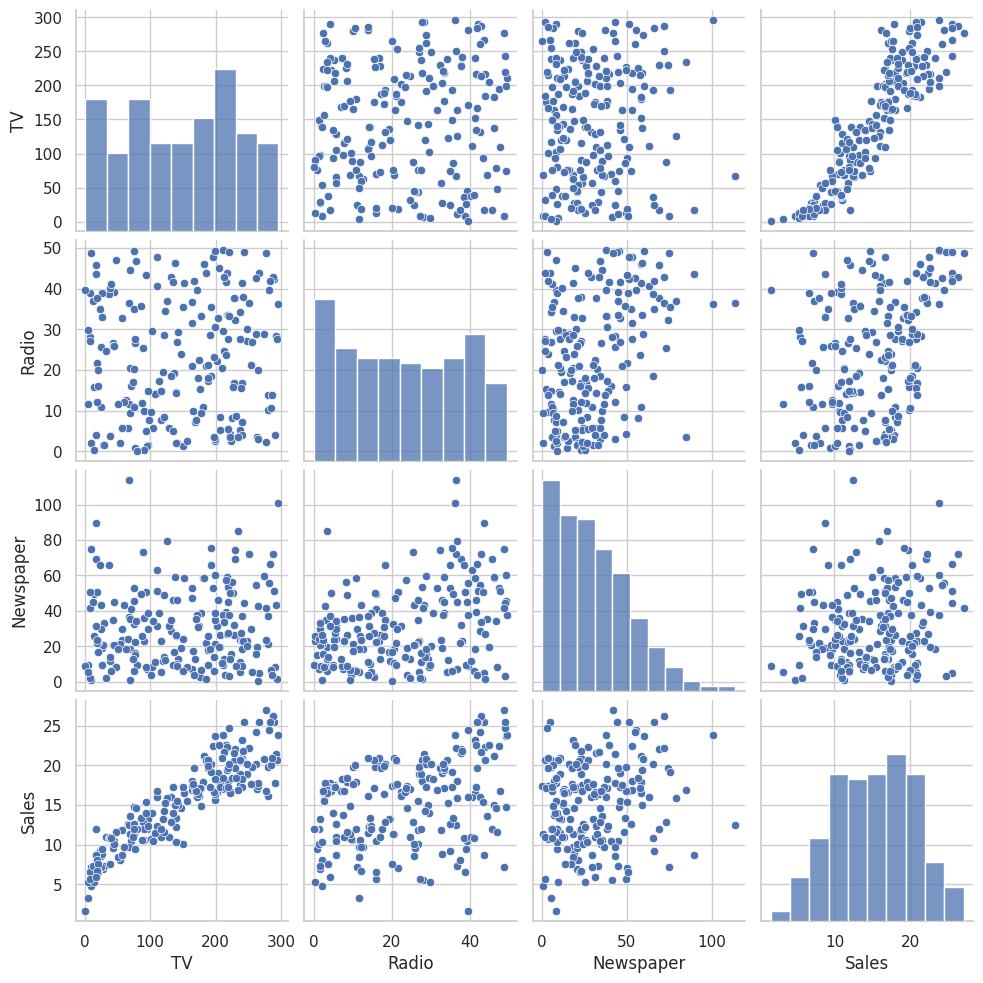

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['TV','Radio','Newspaper', 'Sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

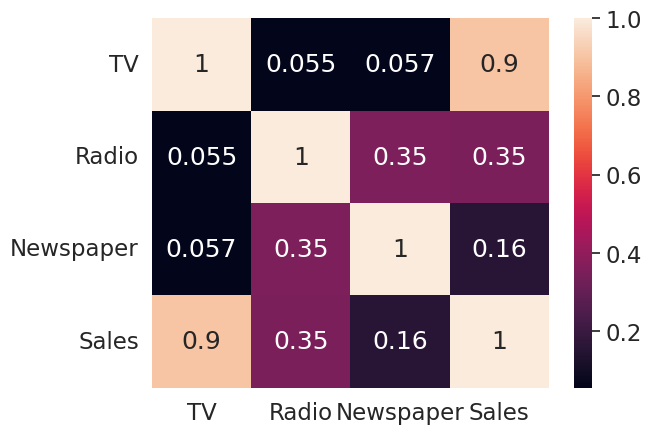

In [ ]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

Text(0.5, 0, 'Costo de publicidad en [tv]')

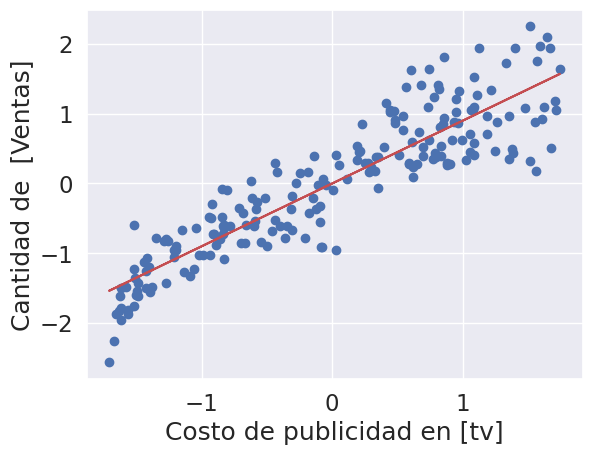

In [ ]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='r')
plt.ylabel("Cantidad de  [Ventas]")
plt.xlabel("Costo de publicidad en [tv]")

In [ ]:
CPT = 50
cpt_std = sc_x.transform(np.array([CPT]).reshape(-1,1))
print("El promedio de ventas es de ", sc_y.inverse_transform(slr.predict(cpt_std)))

El promedio de ventas es de  [[9.74806001]]
